In [1]:
import pandas as pd
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
from community import community_louvain

In [2]:
df_lesmis = pd.read_csv('lesmis/lesmis.csv')

In [3]:
df_lesmis.head()

,Napoleon,1,Myriel,0
0,Myriel,1,Napoleon,0
1,MlleBaptistine,8,Myriel,0
2,Myriel,8,MlleBaptistine,0
3,MmeMagloire,10,Myriel,0
4,Myriel,10,MmeMagloire,0


In [4]:
g = nx.Graph()

In [5]:
nodes = df_lesmis['Napoleon']
edges = df_lesmis[['Napoleon','Myriel']].values

In [6]:
g.add_nodes_from(nodes)
g.add_edges_from(edges)

## Centrality가 높은 상위 5명 인물들을 수업시간에 배운 measure별로 찾고 특성들을 비교하시오

### Degree Centrality

가장 간단한 Centrality 지표로, 하나의 Vertex에 연결된 모든 Edge 개수의 합으로 Centrality를 계산하는 방법<br>
단순하지만, 이를 통해 중요한 Vertex를 찾을 수 있다.

In [7]:
dgr_centrality = nx.degree_centrality(g)

dgr_cent_items = [(b, a) for (a, b) in dgr_centrality.items()]

df_dgr_cent = pd.DataFrame(
    dgr_cent_items, columns=["Degree Centrality", "Node"])
df_dgr_cent = df_dgr_cent.sort_values("Degree Centrality", ascending=False)
df_dgr_cent = df_dgr_cent.reset_index(drop=True)

df_dgr_cent.head()

,Degree Centrality,Node
0,0.473684,Valjean
1,0.289474,Gavroche
2,0.250000,Marius
3,0.223684,Javert
4,0.210526,Thenardier


Valjean은 주인공으로써, 다른 인물들과 관계된 Edge가 많아 Degree Centrality가 높다.

### Eigenvector Centrality

Vertex에 연결된 Edge의 수가 아니라, 연결된 Vertex들의 Centrality를 고려하여 Centrality를 계산하는 방법<br>
e.g., 단순히 팔로워가 많은 것보다는, 팔로워들의 팔로워가 많으면 사람이 더 많이 팔로우할수록 더 중요한 사람으로 볼 수 있음

In [8]:
eigenvector_centrality = nx.eigenvector_centrality(g)

eigenvector_cent_items = [(b, a) for (a, b) in eigenvector_centrality.items()]

df_ev_cent = pd.DataFrame(
    eigenvector_cent_items, columns=[ "Eigenvector Centrality", "Node"])
df_ev_cent = df_ev_cent.sort_values("Eigenvector Centrality", ascending=False)
df_ev_cent = df_ev_cent.reset_index(drop=True)

df_ev_cent.head()

,Eigenvector Centrality,Node
0,0.317839,Gavroche
1,0.267618,Valjean
2,0.267179,Enjolras
3,0.259111,Marius
4,0.242131,Bossuet


Valjean은 주인공으로써, 핵심 인물들과 주요 관계를 맺지만, 그만큼 주요하지 않은 인물들과도 작은 관계들을 맺고 있음을 알 수 있음

### Betweenness Centrality

Vertex 간의 최단 경로 (Shortest Path)를 고려하여 Centrality를 계산하는 방법


A라는 Vertex의 Centrality를 직관적으로 생각할 때, A를 제외한 Vertex들이 A와 얼마나 연결되어있는지를 평가하여 Centrality를 계산함<br>
e.g., A라는 도시의 중요성을 평가하기 위해 A를 제외한 다른 도시의 사람들이 이동을 위해 A를 얼마나 거치는지에 대한 평가

In [9]:
between_centrality = nx.betweenness_centrality(g)

between_cent_items = [(b, a) for (a, b) in between_centrality.items()]

df_between_cent = pd.DataFrame(
    between_cent_items, columns=[ "Betweenness Centrality", "Node"])
df_between_cent = df_between_cent.sort_values("Betweenness Centrality", ascending=False)
df_between_cent = df_between_cent.reset_index(drop=True)

df_between_cent.head()

,Betweenness Centrality,Node
0,0.569989,Valjean
1,0.176842,Myriel
2,0.165113,Gavroche
3,0.132032,Marius
4,0.129645,Fantine


Fatine은 다른 지표에서는 등장하지 않았지만, 최단 경로와 관련된 본 지표에서 등장한다.<br>이는 Fatine가 다른 인물들과의 관계가 많지 않지만, 다른 인물들과의 관계를 통해 다른 인물들과의 관계를 맺는 중요한 역할을 하는 것을 알 수 있다.

### Closeness Centrality

하나의 Vertex가 다른 Vertex까지 가는데 걸리는 최단 경로의 평균을 계산하여 Centrality를 계산하는 방법<br>
e.g., 중심부의 도시는 어디로든 다른 도시에 도달하는 경로가 평균적으로 가장 짧은 것이다

In [10]:
close_centrality = nx.closeness_centrality(g)

close_cent_items = [(b, a) for (a, b) in close_centrality.items()]

df_close_cent = pd.DataFrame(
    close_cent_items, columns=[ "Closeness Centrality", "Node"])
df_close_cent = df_close_cent.sort_values("Closeness Centrality", ascending=False)
df_close_cent = df_close_cent.reset_index(drop=True)

df_close_cent.head()

,Closeness Centrality,Node
0,0.644068,Valjean
1,0.531469,Marius
2,0.517007,Javert
3,0.517007,Thenardier
4,0.513514,Gavroche


### 전체 Centrality 데이터 프레임

In [11]:
df_cent = pd.DataFrame({
    'Degree Centrality': df_dgr_cent['Degree Centrality'],
    'Degree Node': df_dgr_cent['Node'],
    'Betweenness Centrality': df_between_cent['Betweenness Centrality'],
    'Betweenness Node': df_between_cent['Node'], 
    'Closeness Centrality': df_close_cent['Closeness Centrality'],
    'Closeness Node': df_close_cent['Node'],
    'Eigenvector Centrality': df_ev_cent['Eigenvector Centrality'],
    'Eigenvector Node': df_ev_cent['Node']})

In [12]:
df_cent.head(5)

,Degree Centrality,Degree Node,Betweenness Centrality,Betweenness Node,Closeness Centrality,Closeness Node,Eigenvector Centrality,Eigenvector Node
0,0.473684,Valjean,0.569989,Valjean,0.644068,Valjean,0.317839,Gavroche
1,0.289474,Gavroche,0.176842,Myriel,0.531469,Marius,0.267618,Valjean
2,0.250000,Marius,0.165113,Gavroche,0.517007,Javert,0.267179,Enjolras
3,0.223684,Javert,0.132032,Marius,0.517007,Thenardier,0.259111,Marius
4,0.210526,Thenardier,0.129645,Fantine,0.513514,Gavroche,0.242131,Bossuet


1. Valjean이 여러 평가 지표에서 우수하며, 평균적으로 높은 Centrality를 가지고 있음 <br>즉, 주인공으로써 충분히 여러 인물과 관계가 있는 것으로 보임
2. Javert, Fantine은 Degree Centrality가 낮은 것으로 보아, 다른 인물들과의 관계가 적은 것으로 보임 <br>내용상으로 Valjean만을 쫓는 인물이므로, 이에 맞는 결과임
3. Gavroche는 Eigenvector 지표에서는 가장 Centrality가 높지만, Closeness 지표에서는 5등에 그침 <br>따라서, 평가 지표에 따라 중요도한 요소들이 다르게 고려될 수 있다는 것을 알 수 있음

## 인물들의 커뮤니티 그룹을 찾아보시오

In [13]:
commu_groups = sorted(nxcom.greedy_modularity_communities(g), key=len, reverse=True)

In [14]:
def set_node_community(graph, communities):
  for c, v_c in enumerate(communities):
    for v in v_c:
      graph.nodes[v]['community'] = c+1

def set_edge_community(graph):
  for v, w, in graph.edges:
    if graph.nodes[v]['community'] == graph.nodes[w]['community']:
      graph.edges[v, w]['community'] = graph.nodes[v]['community']

    else:
      graph.edges[v,w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
  n = 16
  low, high = 0.1, 0.9
  span = high - low

  r = low + span * (((i + r_off) * 3) % n) / (n - 1)
  g = low + span * (((i + g_off) * 5) % n) / (n - 1)
  b = low + span * (((i + b_off) * 7) % n) / (n - 1)

  return r, g, b

In [15]:
set_node_community(g, commu_groups)
set_edge_community(g)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] <= 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]

In [16]:
top_nodes = []
for community in commu_groups:
    top_node = None
    top_score = 0
    for node in community:
        score = dgr_centrality[node] + between_centrality[node] + close_centrality[node] + eigenvector_centrality[node]
        if score > top_score:
            top_node = node
            top_score = score
    top_nodes.append(top_node)

sizes = [1000 if node in top_nodes else 300 for node in g.nodes]

In [17]:
label_size = {}
for label in df_cent.head(5)['Degree Node']:
    # Top 5에 대해 크기 12로 지정
    label_size[label] = 12

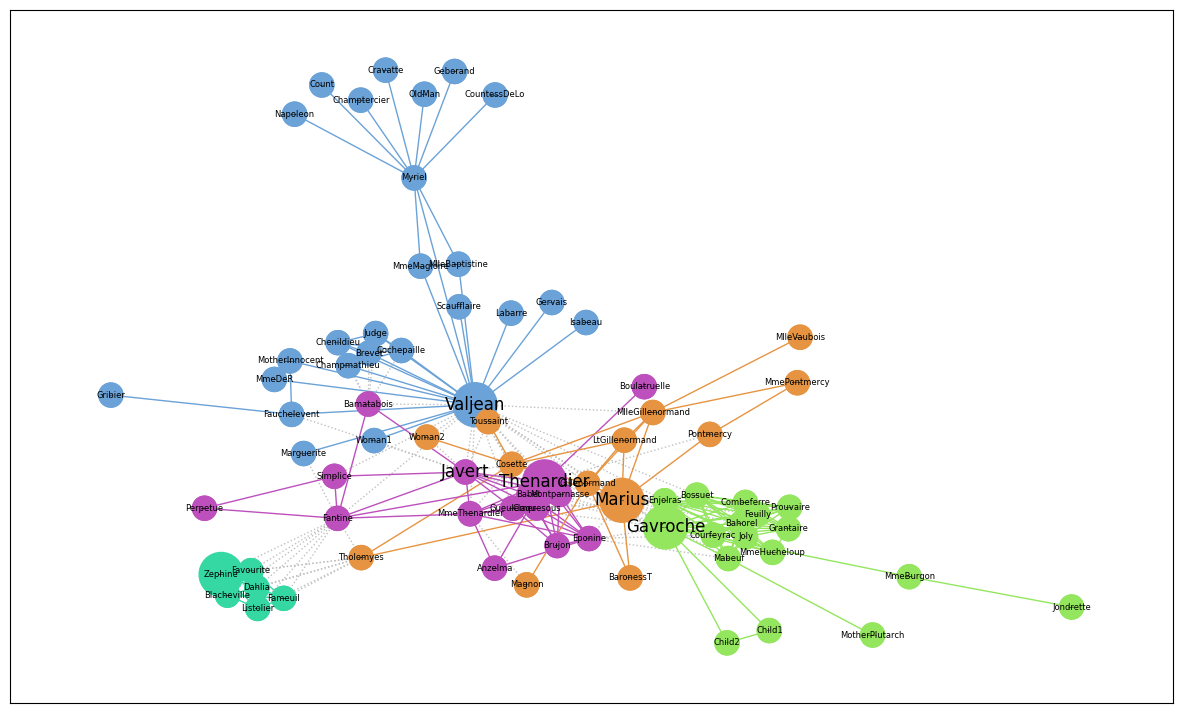

In [18]:
g_pos = nx.spring_layout(g)

plt.figure(figsize=(15,9))

nx.draw_networkx(g,pos=g_pos, node_size=12, edgelist=external, edge_color='silver', style=':', font_size=0)
nx.draw_networkx(g, pos=g_pos, node_color=node_color, edgelist=internal, edge_color=internal_color, font_size=0)
nx.draw_networkx_nodes(g, pos=g_pos, node_color=node_color, node_size=sizes)

for node in g.nodes():
    nx.draw_networkx_labels(g, pos=g_pos, labels={node: node}, font_size=label_size.get(node, 6))

1. 주인공 Valjean이 다양한 사람들과 관계를 맺고 있는것을 확인할 수 있음.
2. Valjean을 괴롭히고, 쫓는 데에 관여한 Javert와 Thenardier 부부는 장발장을 괴롭히고 있다는 측면에서 한 커뮤니티 그룹으로 묶일 수 있음
3. Gavroche는 Thenardier 부부의 자식으로, 가까운 사이이지만  Valjean을 괴롭히는 무리의 그룹원이 아니므로, Thenardier 부부와는 다른 커뮤니티 그룹으로 묶일 수 있음
4. Fantine은 Valjean의 관계 등, 일부 표시하지 못한 커뮤니티 그룹들이 존재함
5. 장발장의 스토리라인을 고려했을 때, 커뮤니티 그룹은 크게 2가지 (Valjean / Valjean의 대적자), 더 작게는 대적자 무리의 Javert, Gavroche 부부가 있음<br>약 5그룹 정도로 추정

### Resolution을 0.5로 변경하여 확인

In [19]:
commu_groups = community_louvain.best_partition(g, resolution=0.5) 

In [20]:
for v, c in commu_groups.items():
    g.nodes[v]['community'] = c + 1
set_edge_community(g)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = [get_color(g.edges[e]['community']) for e in internal]

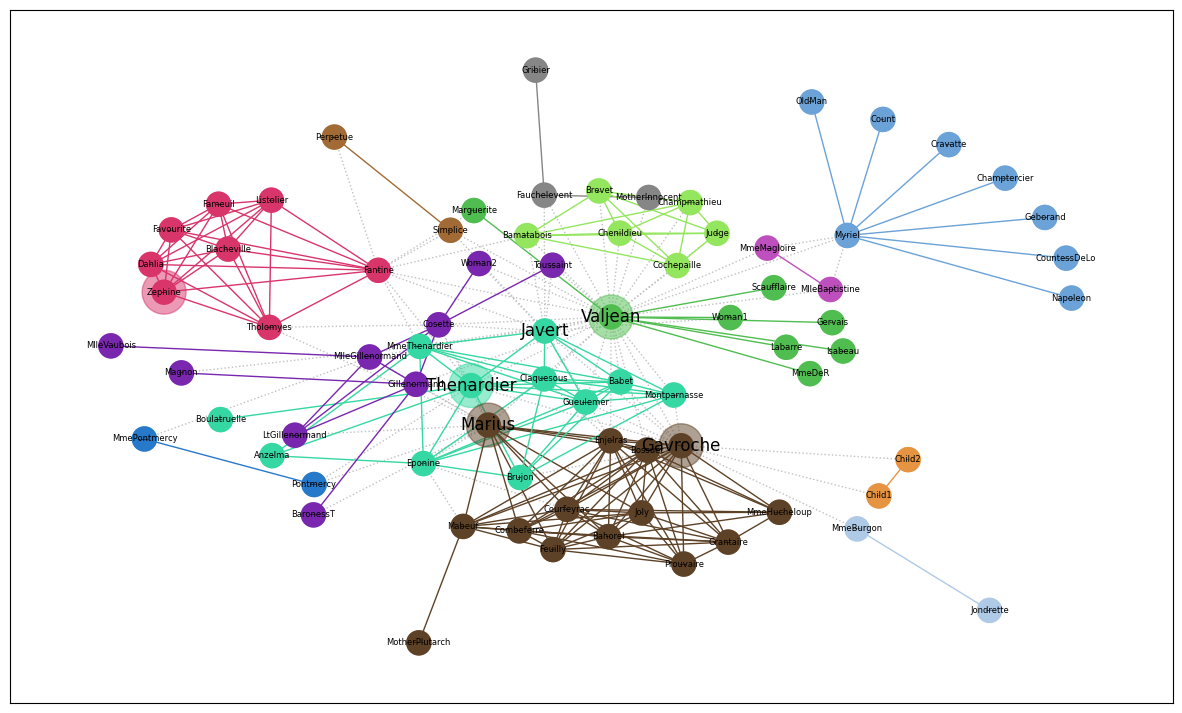

In [21]:
g_pos = nx.kamada_kawai_layout(g)

plt.figure(figsize=(15, 9))

nx.draw_networkx(g, pos=g_pos, node_size=12, edgelist=external, edge_color='silver', style=':', font_size=0)
nx.draw_networkx(g, pos=g_pos, node_color=node_color, edgelist=internal, edge_color=internal_color, font_size=0)
nx.draw_networkx_nodes(g, pos=g_pos, node_color=node_color, node_size=sizes, alpha=0.5)

for node in g.nodes():
    nx.draw_networkx_labels(g, pos=g_pos, labels={node: node}, font_size=label_size.get(node, 6))

1. 주인공 Valjean이 다양한 인물들과 관계를 맺는 것은 여전함. 다만, 주요한 인물들 위주로 관계를 맺음을 확인할 수 있음
2. Thenardier 부부, Javert는 장발장을 의심하고, 괴롭히는 대부분의 무리들과 커뮤니티 그룹으로 묶일 수 있음
3. Myriel 주교는 Valjean의 회개에 주요 역할을 했지만, 주요한 인물이 아니므로 Valjean의 커뮤니티 그룹과 나누어졌음